In [ ]:
from time import time
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import numpy as np
import os
import distutils
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.5)

# Show people's names
for name in lfw_people.target_names:
  print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


In [ ]:
print(lfw_people.data.dtype)
print(lfw_people.data.shape) 
print(lfw_people.images.shape)

float32
(1560, 2914)
(1560, 62, 47)


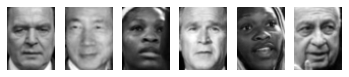

In [ ]:
n = 6
fig, ax = plt.subplots(1,n)
for i in range(n):
  ax[i].imshow(lfw_people.images[np.random.randint(0,lfw_people.data.shape[0])],cmap='gray')
  ax[i].axis('off')

In [ ]:
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

#print("Total dataset size:")
#print("n_samples: %d" % n_samples)
#print("n_features: %d" % n_features)
#print("n_classes: %d" % n_classes)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=4361
)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 72

t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, lfw_people.images.shape[1], lfw_people.images.shape[2]))


done in 0.517s


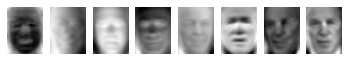

In [ ]:
n=8
fig, ax = plt.subplots(1,n)
for i in range(n):
  ax[i].imshow(eigenfaces[i],cmap='gray')
  ax[i].axis('off')

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1170, 2914)
(390, 2914)


In [ ]:
print(pca.components_.shape)
new_pca = pca.components_
new_pca = new_pca[15:]
print(new_pca.shape)

(72, 2914)
(57, 2914)


In [ ]:
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Projecting the input data on the eigenfaces orthonormal basis
done in 0.032s


In [ ]:
y_train.shape

(1170, 12)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,n_classes)
y_test = tf.keras.utils.to_categorical(y_test,n_classes)

In [ ]:
model = SVC()
model.fit(X_train_pca, y_train)

In [ ]:
pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy {accuracy:.4}')
print(confusion_matrix(y_test, pred))

What is the optimal number of principal compoments? 72-73
does removing the first few components improve classification?

Using Dense network

In [ ]:
def dense_model(inputs = 784,hidden_1=500, hidden_2=500 ,classes = 10):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,), activation='relu'))
  model.add(Dense(hidden_2, activation='relu'))
  model.add(Dense(classes, activation='softmax'))
  return model

In [ ]:
dense_network = dense_model(inputs=n_components,classes = n_classes)
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

In [ ]:
history = dense_network.fit(
    X_train_pca, y_train,
    epochs =  20, 
    batch_size=256, 
    verbose = 1,
    validation_data=(X_test_pca, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

Epoch 1/20
5/5 [==============================] - 1s 61ms/step - loss: 2.2700 - accuracy: 0.2530 - val_loss: 1.6706 - val_accuracy: 0.4128
Epoch 2/20
5/5 [==============================] - 0s 20ms/step - loss: 1.4645 - accuracy: 0.5333 - val_loss: 1.2981 - val_accuracy: 0.7179
Epoch 3/20
5/5 [==============================] - 0s 20ms/step - loss: 0.9661 - accuracy: 0.7658 - val_loss: 0.9793 - val_accuracy: 0.7154
Epoch 4/20
5/5 [==============================] - 0s 24ms/step - loss: 0.6712 - accuracy: 0.8436 - val_loss: 1.0096 - val_accuracy: 0.7410
Epoch 5/20
5/5 [==============================] - 0s 21ms/step - loss: 0.5343 - accuracy: 0.8803 - val_loss: 0.7645 - val_accuracy: 0.7795
Epoch 6/20
5/5 [==============================] - 0s 19ms/step - loss: 0.3707 - accuracy: 0.9316 - val_loss: 0.6889 - val_accuracy: 0.8205
Epoch 7/20
5/5 [==============================] - 0s 21ms/step - loss: 0.2834 - accuracy: 0.9530 - val_loss: 0.6805 - val_accuracy: 0.8333
Epoch 8/20
5/5 [===========

In [ ]:
dense_network = dense_model(inputs=2914 ,classes = n_classes)
dense_network.summary() 
dense_network.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               1457500   
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_8 (Dense)              (None, 12)                6012      
Total params: 1,714,012
Trainable params: 1,714,012
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = dense_network.fit(
    X_train, y_train,
    epochs =  20, 
    batch_size=256, 
    verbose = 1,
    validation_data=(X_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

Epoch 1/20
5/5 [==============================] - 0s 69ms/step - loss: 2.3658 - accuracy: 0.3316 - val_loss: 2.3938 - val_accuracy: 0.3538
Epoch 2/20
5/5 [==============================] - 0s 60ms/step - loss: 2.3531 - accuracy: 0.3333 - val_loss: 2.3944 - val_accuracy: 0.3513
Epoch 3/20
5/5 [==============================] - 0s 61ms/step - loss: 2.6110 - accuracy: 0.3120 - val_loss: 2.3689 - val_accuracy: 0.3538
Epoch 4/20
5/5 [==============================] - 0s 61ms/step - loss: 8.5007 - accuracy: 0.2726 - val_loss: 2.3592 - val_accuracy: 0.3538
Epoch 5/20
5/5 [==============================] - 0s 58ms/step - loss: 2.3191 - accuracy: 0.3333 - val_loss: 2.3464 - val_accuracy: 0.3538
Epoch 6/20
5/5 [==============================] - 0s 61ms/step - loss: 2.3084 - accuracy: 0.3350 - val_loss: 2.3339 - val_accuracy: 0.3538
Epoch 7/20
5/5 [==============================] - 0s 61ms/step - loss: 2.2970 - accuracy: 0.3342 - val_loss: 2.3213 - val_accuracy: 0.3538
Epoch 8/20
5/5 [===========

Using CNN

In [ ]:
X = lfw_people.images/255
y = lfw_people.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=4361
)

y_train = tf.keras.utils.to_categorical(y_train,n_classes)
y_test = tf.keras.utils.to_categorical(y_test,n_classes)

X_train = np.float32(np.expand_dims(X_train, -1))
X_test = np.float32(np.expand_dims(X_test, -1))

In [ ]:
def cnn_model(input_shape=(28,28,1),classes = 10):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(classes, activation='softmax'))
  return model

In [ ]:
cnn = cnn_model(input_shape = (62,47,1), classes = n_classes)
cnn.summary() 
cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"])
all_history = []

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 60, 45, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8960)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 12)                107532    
Total params: 126,348
Trainable params: 126,348
Non-trainable params: 0
________________________________________________

In [ ]:
history = cnn.fit(
    X_train, y_train,
    epochs =  200, 
    batch_size=256, 
    verbose = 1,
    validation_data=(X_test, y_test),
)

all_history.append(history)

print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))

NameError: ignored